In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import  tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_lables),(test_images,test_lables) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [29]:
train_lables.reshape(6000,-1)

array([[9, 0, 0, ..., 2, 5, 5],
       [0, 9, 5, ..., 0, 6, 4],
       [3, 1, 4, ..., 2, 4, 4],
       ...,
       [9, 3, 5, ..., 2, 9, 7],
       [3, 2, 4, ..., 6, 6, 1],
       [4, 1, 7, ..., 3, 0, 5]], dtype=uint8)

In [6]:
train_images[0,23,23]

194

In [5]:
test_images.shape

(10000, 28, 28)

In [7]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

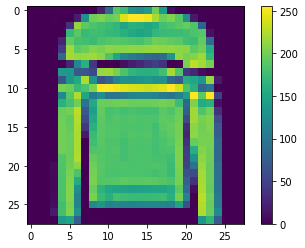

In [19]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

### Scaling

In [0]:
train_images = train_images/255
test_images = test_images/255

### Model

In [0]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)), #Input Layer
     keras.layers.Dense(128,activation='relu'), #Hidden Layer
     keras.layers.Dense(10,activation='softmax') #Output Layer
    ]
)

In [0]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [32]:
model.fit(train_images,train_lables,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2318 - accuracy: 0.9124
Epoch 2/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2211 - accuracy: 0.9169
Epoch 3/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2153 - accuracy: 0.9194
Epoch 4/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2085 - accuracy: 0.9214
Epoch 5/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2030 - accuracy: 0.9238
Epoch 6/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1971 - accuracy: 0.9255
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1936 - accuracy: 0.9274
Epoch 8/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1846 - accuracy: 0.9303
Epoch 9/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1817 - accuracy: 0.9311
Epoch 10/20
60

In [33]:
test_loss , test_acc = model.evaluate(test_images,test_lables, verbose=1)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.4236 - accuracy: 0.8816
0.4236042416989803 0.8816


### Predictions

In [0]:
predictions = model.predict(test_images)

In [38]:
predictions[0]

array([1.2599625e-13, 1.3368428e-13, 6.5933098e-10, 7.7090706e-20,
       5.7908249e-08, 5.0985414e-06, 2.1352473e-12, 8.6668137e-05,
       8.7604762e-14, 9.9990821e-01], dtype=float32)

Trouser


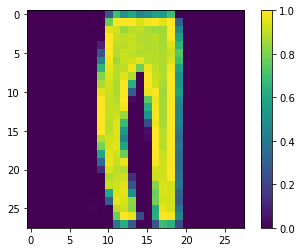

In [41]:
n = 2
print(class_names[np.argmax(predictions[n])])
plt.figure()
plt.imshow(test_images[n])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 7


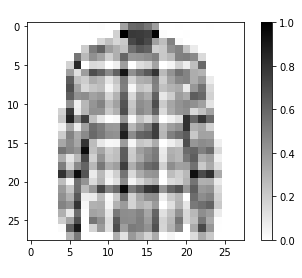

In [44]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_lables[num]
predict(model, image, label)
